# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration for hypotheses 3: The number of floors should have a negative impact on the price of the house: the more floors relative to the living area, the lower the selling price should be
  * Additional variables are created or renamed and some graphical explorations are performed

##### Getting data

In [119]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

In [ ]:
df_eda = pd.read_csv("eda5.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head() 

##### Floors adusted to living area

In [121]:
df_eda["sqmeter_living"] = df_eda["sqft_living"] * 0.092903
df_eda['sqmeter_living'].describe()
 

count    14781.000000
mean       193.001888
std         84.571879
min         34.374110
25%        132.851290
50%        177.444730
75%        235.973620
max       1257.906620
Name: sqmeter_living, dtype: float64

#### Actually instead of 100 meter I should take the median = 177

In [ ]:
# Ratio floors to living area
# Rescaling from footage square to meter square
df_eda['floors_livmeter']=(df_eda["floors"]/(df_eda["sqft_living"]*0.092903)) * 100
# df_eda.head()

## Checking for  correlaiton of price and number of 1) floors and 2) adjusted ratio floors/living square

Text(95.7222222222222, 0.5, 'Features')

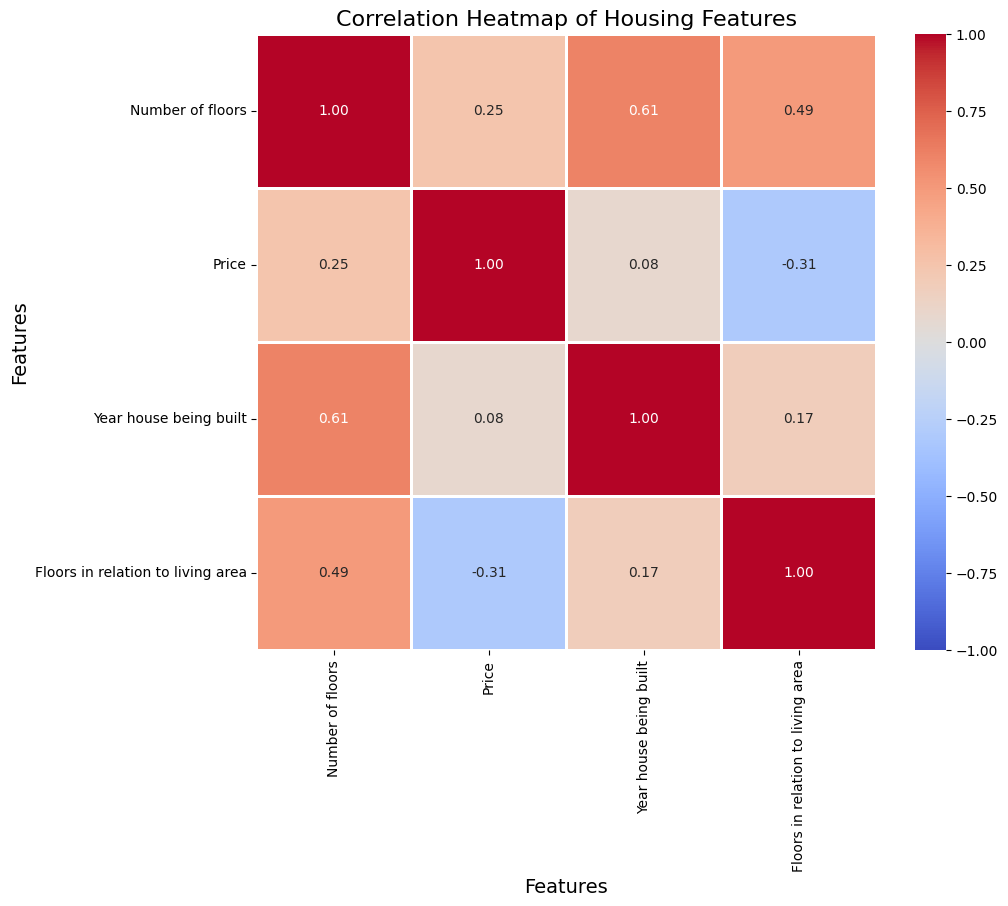

In [123]:
new_column_names = {
    'floors': 'Number of floors',
    'price': 'Price',
    'yr_built': 'Year house being built',
    'floors_livmeter': 'Floors in relation to living area',
    
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

##### Taking living area into account: similar to EDA_4_hyp_1

In [124]:
df_eda["Floors in relation to living area"].describe()

count    14781.000000
mean         0.845262
std          0.408849
min          0.152680
25%          0.569519
50%          0.752721
75%          1.015464
max          4.248914
Name: Floors in relation to living area, dtype: float64

In [125]:
# Define bins accroding to destribution and labels
df_eda["Floors in relation to living area"].describe()
bins = [0, 0.56, 0.75, 1, float('inf')]
labels = ['Very few (0 - 0.56)', 'Few (0.56-0.75)', 'Middle (0.75-1)', 'Many (1+)']
# Apply pd.cut to bin the data
df_eda['floors_100'] = pd.cut(df_eda['Floors in relation to living area'], bins=bins, labels=labels)


##### Price destribution by numbers of floors and by adjusting floors to living area per 100 sqm  

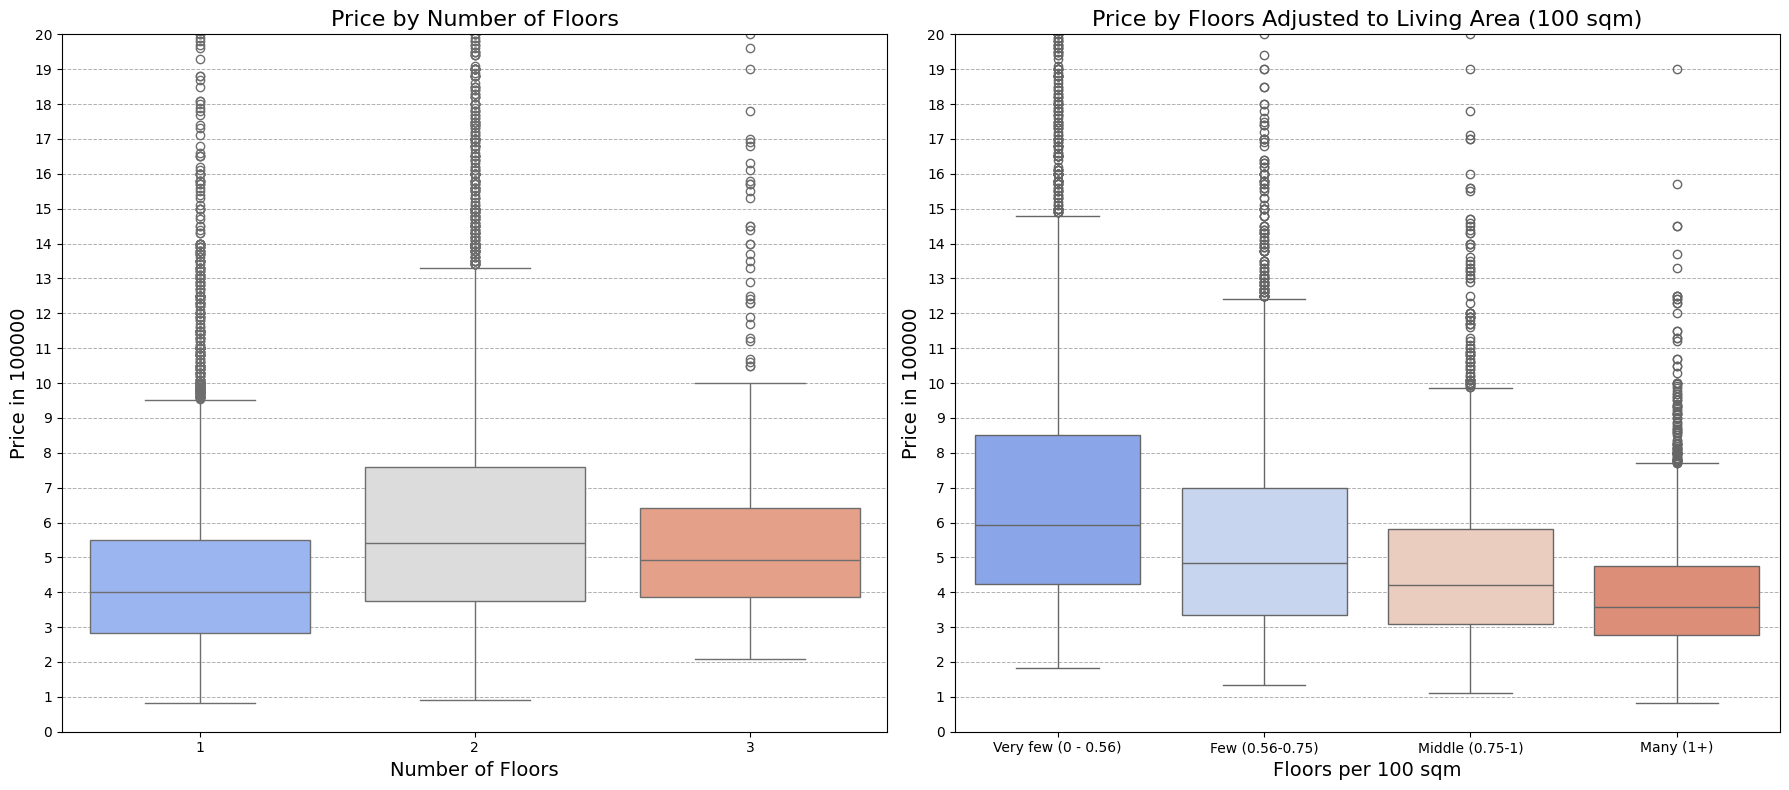

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), dpi=100)  # 1 row, 2 columns of plots
sns.boxplot(
    x='Number of floors',  # Binned categories
    y='Price',             # Variable to plot
    data=df_eda,           # Data source
    palette='coolwarm',    # Color palette for the boxplot
    ax=axes[0]             # Place this plot in the first subplot
)

# Define finer ticks for y-axis (e.g., intervals of 0.5)
y_ticks = np.arange(0, 20.5, 1)
# Adding labels and title to the first boxplot
axes[0].set_title('Price by Number of Floors', fontsize=16)
axes[0].set_xlabel('Number of Floors', fontsize=14)
axes[0].set_ylabel('Price in 100000', fontsize=14)
axes[0].set_ylim(0, 20)
axes[0].set_yticks(y_ticks)  # Set finer ticks for the y-axis
axes[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)  # Finer grid on y-axis

# Second boxplot (Price Distribution by floors adjusted to living area)
sns.boxplot(
    x='floors_100',        # Binned categories
    y='Price',             # Variable to plot
    data=df_eda,           # Data source
    palette='coolwarm',    # Color palette for the boxplot
    ax=axes[1]             # Place this plot in the second subplot
)
# Adding labels and title to the second boxplot
axes[1].set_title('Price by Floors Adjusted to Living Area (100 sqm)', fontsize=16)
axes[1].set_xlabel('Floors per 100 sqm', fontsize=14)
axes[1].set_ylabel('Price in 100000', fontsize=14)
axes[1].set_ylim(0, 20)
axes[1].set_yticks(y_ticks)  # Set finer ticks for the y-axis
axes[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)  # Finer grid on y-axis

# Adjust layout for better spacing
plt.tight_layout()

# Display the combined figure 